<a href="https://colab.research.google.com/github/lahirumanulanka/ai-notebooks/blob/main/01_overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Sumani
# https://www.linkedin.com/in/sumanaruban/
# https://github.com/Sumanaruban
# 20-7-2025

# Introduction

This notebook explains the concepts of overfitting and underfitting, common issues encountered when training machine learning and deep learning models.

In machine learning, our goal is to develop models that can generalize well to unseen data. However, two common pitfalls can hinder this:

- Underfitting: The model is too simple to learn the underlying pattern in the training data.

- Overfitting: The model learns the training data too well, including the noise, and fails to generalize to new data.

In this notebook, you will observe both phenomena through visual and coding experiments using synthetic data and neural networks in PyTorch.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Seed for reproducibility
np.random.seed(0)
_ = torch.manual_seed(0)

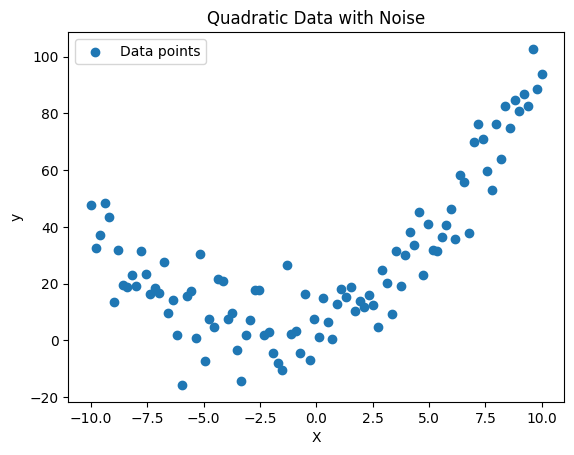

In [9]:
# Generate quadratic data with noise
def generate_data(n_samples=100):
    X = np.linspace(-10, 10, n_samples)
    y = 0.5 * X**2 + 3 * X + 10 + np.random.randn(n_samples) * 10  # Quadratic pattern with noise
    # y = 0.5 * X**2 + 3 * X + 10 # Quadratic pattern without noise
    return X, y

X, y = generate_data()

# Plot the generated data
plt.scatter(X, y, label='Data points')
plt.title('Quadratic Data with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

The dataset we’re using has a clear pattern, along with some noise. This allows us to test how well different models capture the true trend versus overreacting to random fluctuations.

- If a model fails to follow even the clear trend, it's underfitting.

- If a model bends too much to fit every noisy point, it's overfitting.

The goal is to find a model that fits the signal, not the noise.

In [10]:
# Simple Linear Model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


In [11]:
class OverfittingModel(nn.Module):
    def __init__(self):
        super(OverfittingModel, self).__init__()
        self.fc1 = nn.Linear(1, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

In [12]:
def train_model(model, X_train, y_train, num_epochs=1000, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

In [13]:
def plot_model(model, X, y, title):
    model.eval()
    X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    with torch.no_grad():
        y_pred = model(X_tensor).numpy()

    plt.scatter(X, y, label='Data points')
    plt.plot(X, y_pred, color='red', label='Model prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

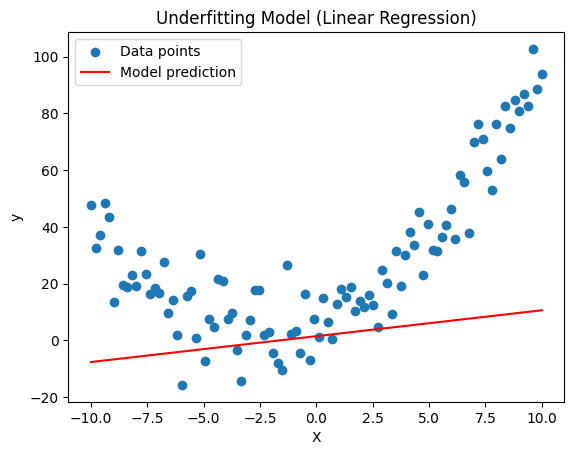

In [14]:
# Underfitting model
linear_model = LinearModel()
linear_model = train_model(linear_model, X, y, num_epochs=1000)

# Plot results for underfitting model
plot_model(linear_model, X, y, 'Underfitting Model (Linear Regression)')

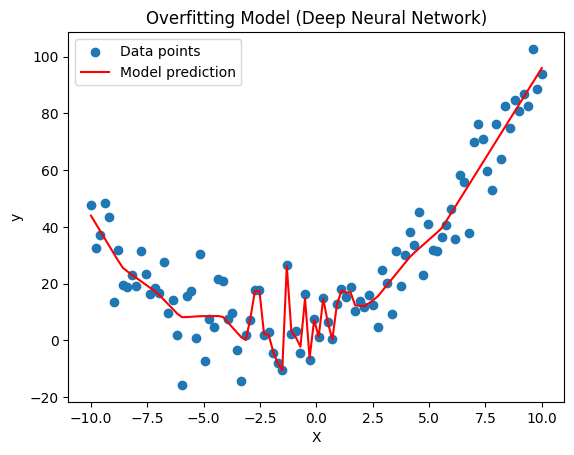

In [15]:
# Overfitting model
overfitting_model = OverfittingModel()
overfitting_model = train_model(overfitting_model, X, y, num_epochs=1000)

# Plot results for overfitting model
plot_model(overfitting_model, X, y, 'Overfitting Model (Deep Neural Network)')

In [16]:
class IdealModel(nn.Module):
    def __init__(self):
        super(IdealModel, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

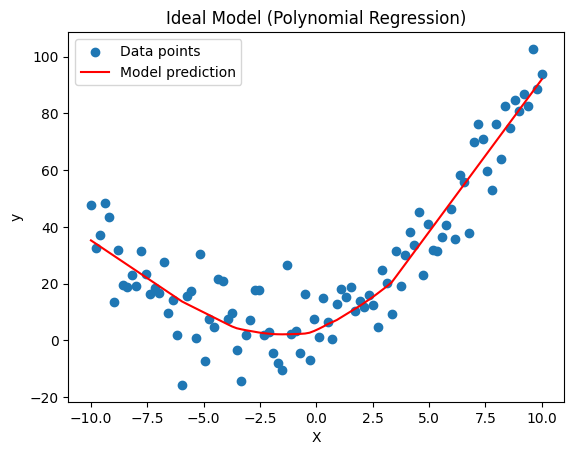

In [17]:
# Ideal model
ideal_model = IdealModel()
ideal_model = train_model(ideal_model, X, y, num_epochs=1000)

plot_model(ideal_model, X, y, 'Ideal Model (Polynomial Regression)')

Look carefully at the training and validation losses:

- If both are high → underfitting (model can’t capture data patterns).

- If training loss is low but validation loss is high → overfitting (model memorized training data but can’t generalize).

- If both are low → well-fitted model.

Use plots to visualize predictions against true data to reinforce these observations.

# Exercise

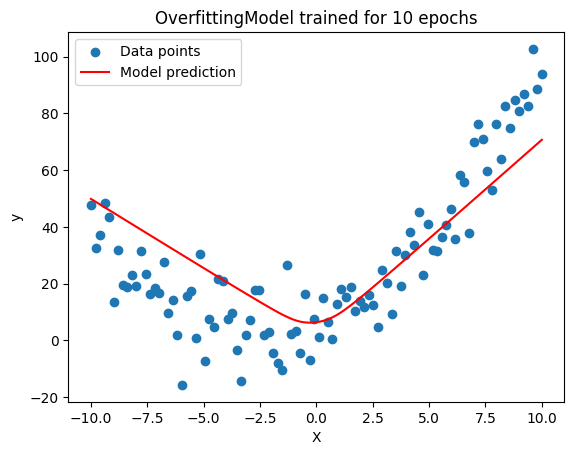

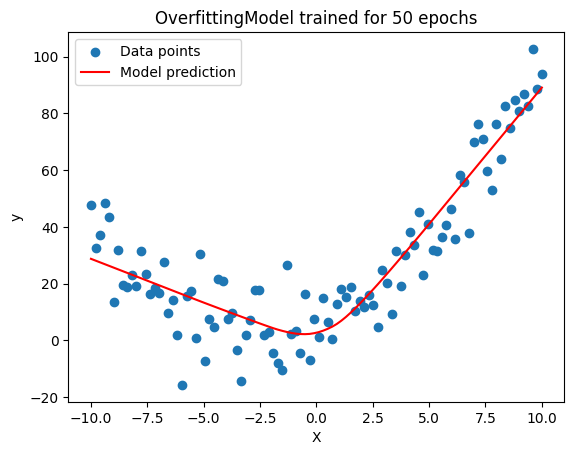

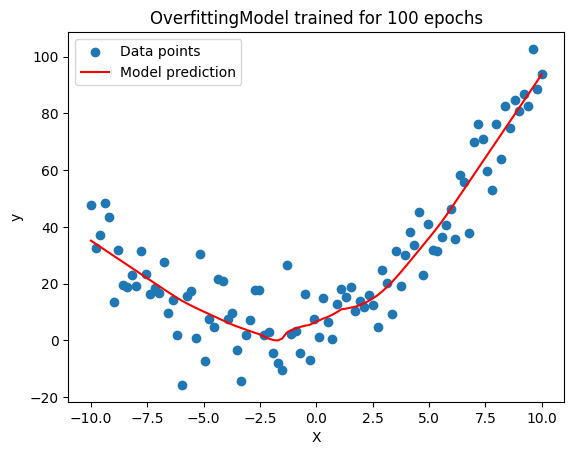

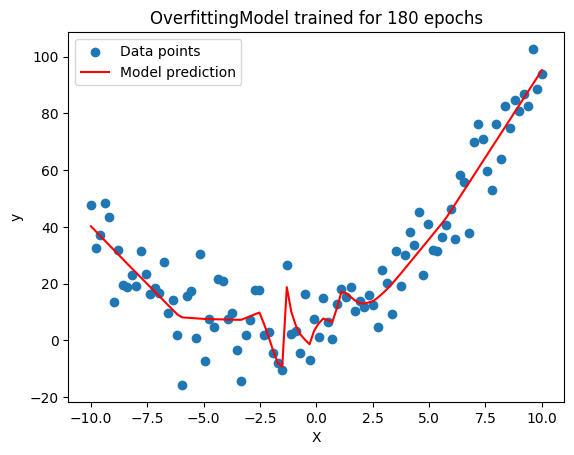

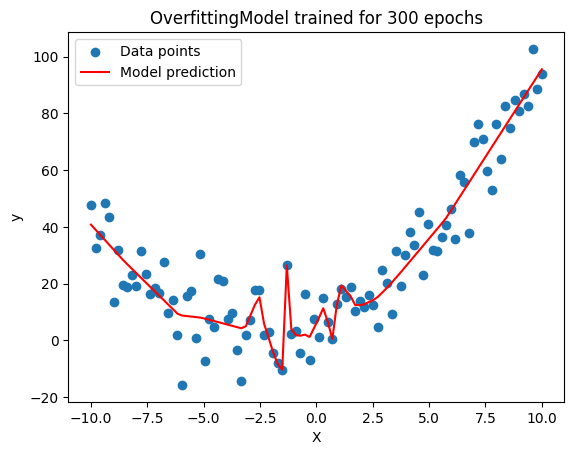

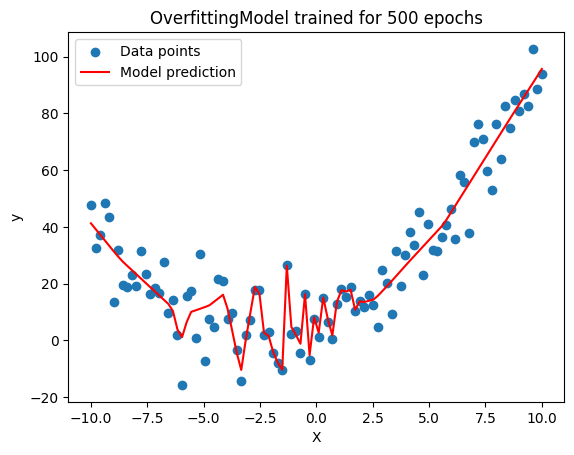

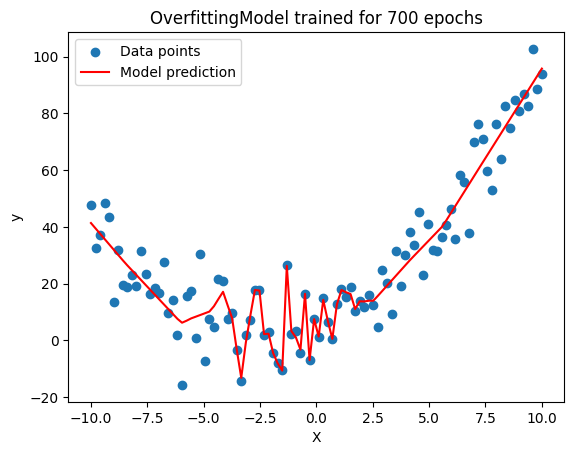

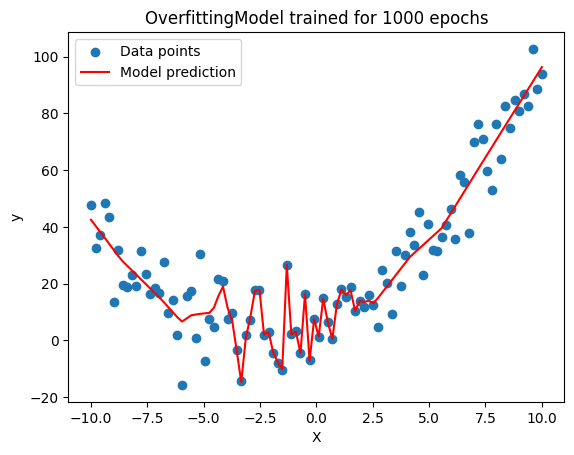

In [18]:
# Exercise 1 - Change the number of epochs in the OverfittingModel and find the right epochs that reduces the overfitting issue
epoch_list = [10, 50, 100, 180, 300, 500, 700, 1000]
model = OverfittingModel()
for epochs in epoch_list:
    model = train_model(model, X, y, num_epochs=epochs)
    plot_model(model, X, y, f'OverfittingModel trained for {epochs} epochs')

# right epochs is 50

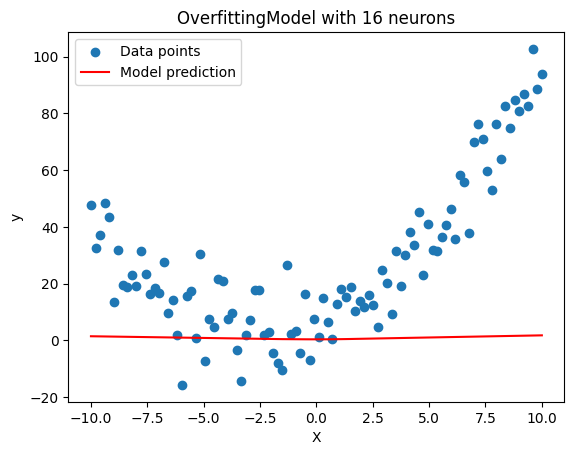

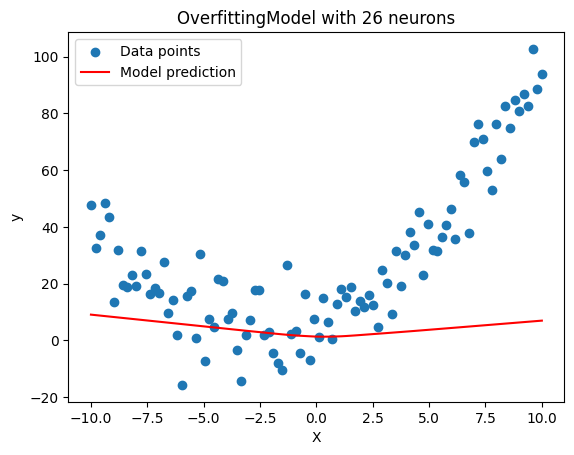

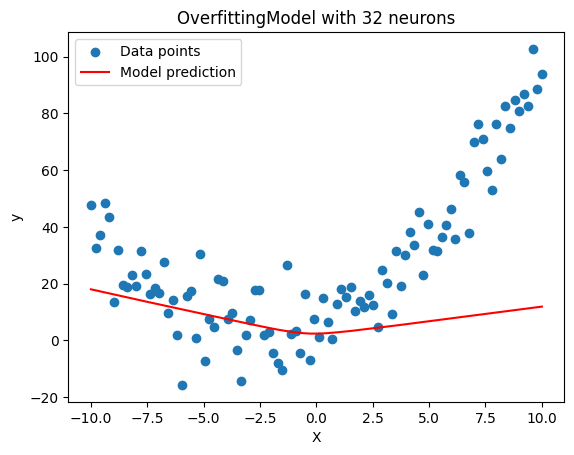

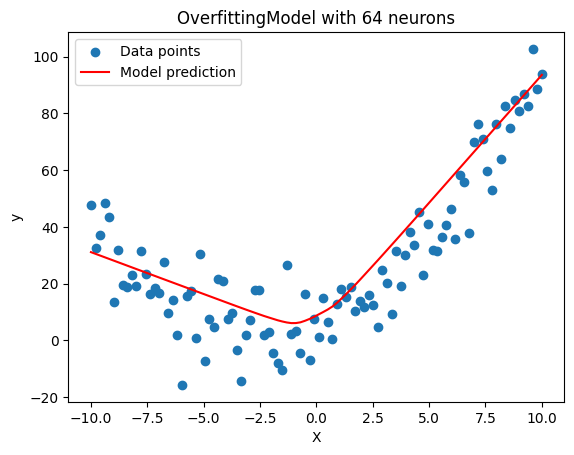

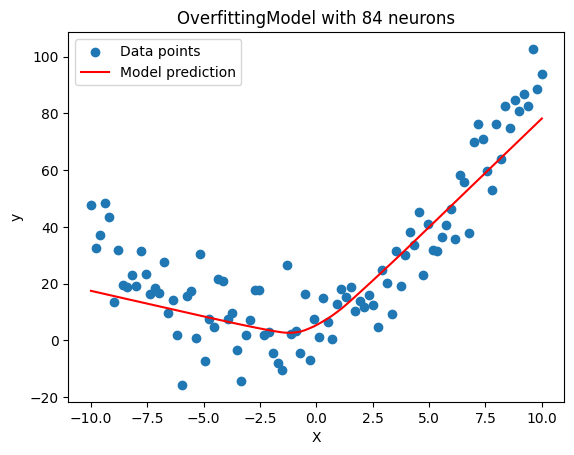

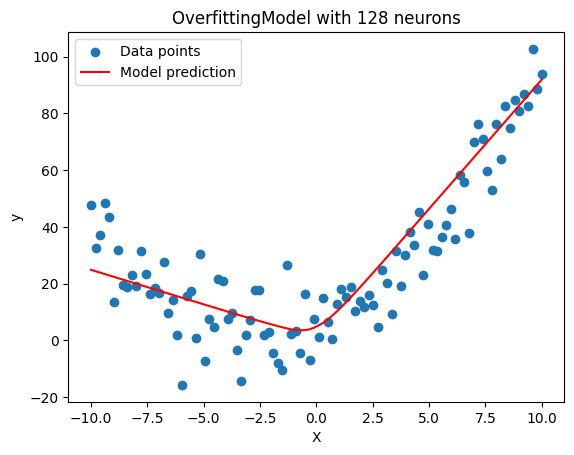

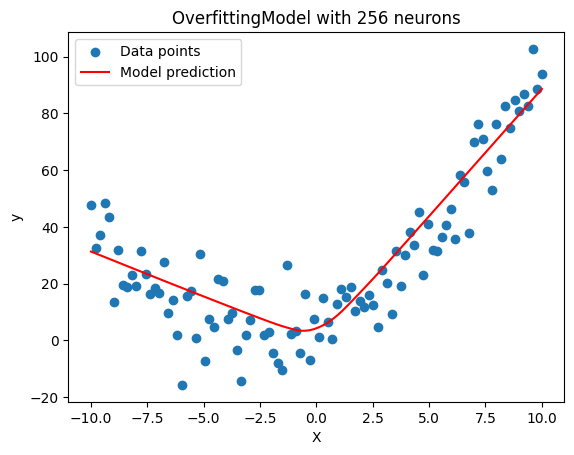

In [27]:
# Exercise 2 - Change the number of neurons in the hidden layers of the OverfittingModel and find the right model architecture that reduces the overfitting issue
eurons_list = [64, 84, 128, 256, 512, 1024, 2048, 4096]
for neurons in neurons_list:
    model.fc1 = nn.Linear(1, neurons)
    model.fc2 = nn.Linear(neurons, neurons)
    model.fc3 = nn.Linear(neurons, neurons)
    model.fc4 = nn.Linear(neurons, neurons)
    model.fc5 = nn.Linear(neurons, 1)
    model = train_model(model, X, y, num_epochs=50)
    plot_model(model, X, y, f'OverfittingModel with {neurons} neurons')

# right model architecture is num_epochs are 50 and 128 neurons

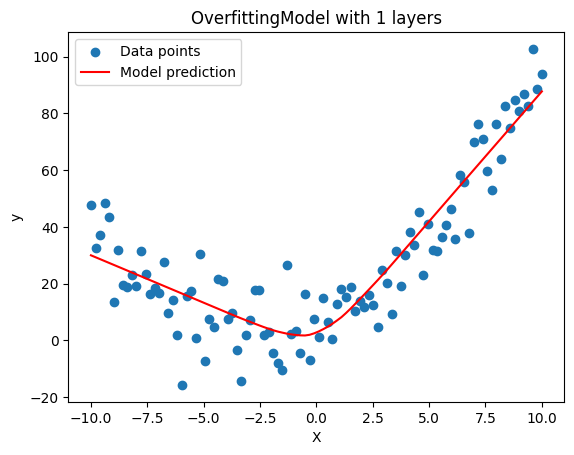

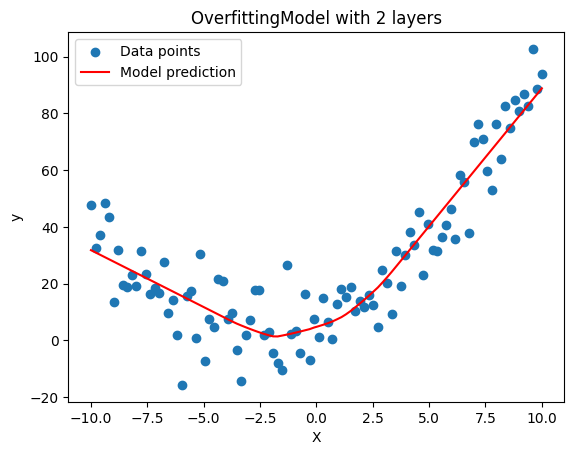

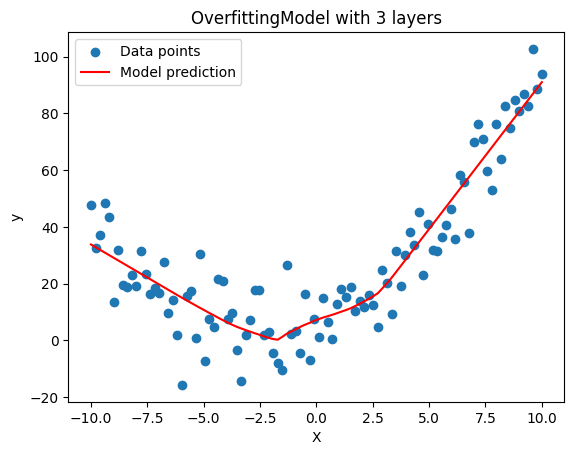

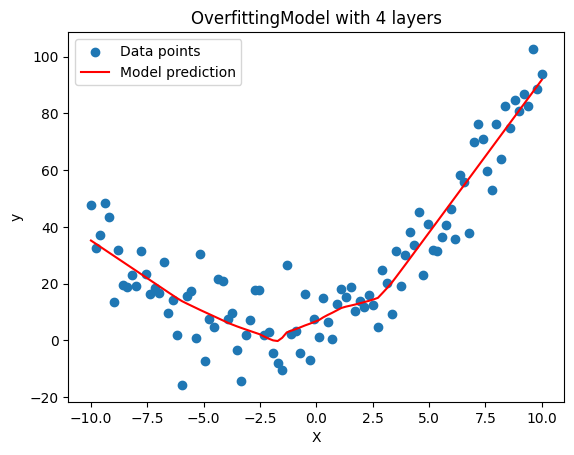

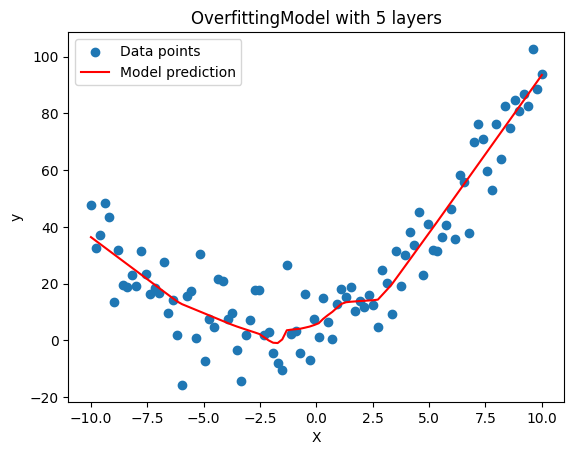

In [29]:
# Exercise 3 - Change the layers of the OverfittingModel and find the right model architecture that reduces the overfitting issue
class OverfittingModel(nn.Module):
    def __init__(self, num_layers):
        super(OverfittingModel, self).__init__()

        layers = [nn.Linear(1, 128), nn.ReLU()]

        for _ in range(num_layers - 1):
            layers.append(nn.Linear(128, 128))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(128, 1))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

layers_list = [1, 2, 3, 4, 5]
for layers in layers_list:
    model = train_model(model, X, y, num_epochs=50)
    plot_model(model, X, y, f'OverfittingModel with {layers} layers')

# right model architecture is num_epochs are 50, 128 neurons 2 layers

In [21]:
# Exercise 4 - Find advanced regularization techniques and apply those techniques to the
# same OverfittingModel (i.e., do not change the original OverfittingModel's architecture) and derive a better model
# with the help of the advanced regularization techniques

In [22]:
# Exercise 5 - Impact of Noise

# Increase or decrease the noise in the synthetic dataset.

# How does the level of noise influence the model's ability to generalize?

# Which model handles noisy data better?

In [23]:
# Exercise 6 - Early Stopping

# Try training the same model for 100, 500, and 1000 epochs.

# At which point does the model start to overfit?

# Can you suggest a stopping criterion to prevent overfitting?

In [24]:
# Exercise 7: Regularization

# Add a dropout layer or use L2 regularization in your model.

# How does it affect training and validation losses?

# Can you explain why regularization helps prevent overfitting?

In [25]:
# Exercise 8: Think and Reflect

# Suppose you build a highly accurate model on training data, but it performs poorly in real-world data.

# What could be the reasons?

# How would you identify and fix the issue?